In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import 

data = pd.read_csv('./Datasets/Lab9.csv')

print(data.head(10))

print("\n" * 2)

print("Basic Statistics:")
print(data.describe())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], bins=20, kde=True, color='blue')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['tip'], bins=20, kde=True, color='green')
plt.title('Distribution of Tips')
plt.xlabel('Tip')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



SyntaxError: invalid syntax (4242643127.py, line 5)

Mean Absolute Error (MAE): 0.5715
R-squared (R²): 0.7007


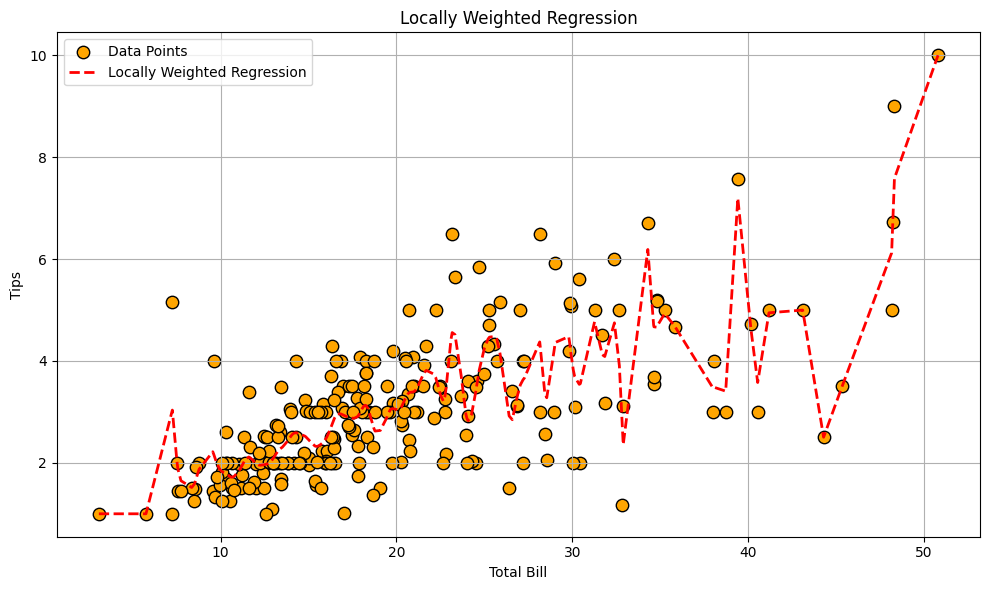

In [2]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k ** 2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    XTWX = xmat.T @ (wei @ xmat)

    regularization = 1e-5 * np.eye(XTWX.shape[0])

    W = np.linalg.pinv(XTWX + regularization) @ (xmat.T @ (wei @ ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] @ localWeight(xmat[i], xmat, ymat, k)
    return ypred

bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip) 
m = np.shape(mbill)[1]

one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T)) 

ypred = localWeightRegression(X, mtip, 0.3)

SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mae = mean_absolute_error(tip, ypred)
r2 = r_squared(tip, ypred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(bill, tip, color='orange', edgecolor='black', s=80, marker='o', label='Data Points')

ax.plot(xsort[:, 1], ypred[SortIndex], color='red', linewidth=2, linestyle='--', label='Locally Weighted Regression')

ax.grid(True)

plt.title('Locally Weighted Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.legend()
plt.tight_layout()
plt.show()